# Linear Regression

In [65]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
import seaborn as sns

In [2]:
### cars
cars = sm.datasets.get_rdataset("Duncan", "carData")

In [6]:
cars.data

,type,income,education,prestige
accountant,prof,62,86,82
pilot,prof,72,76,83
architect,prof,75,92,90
author,prof,55,90,76
chemist,prof,64,86,90
minister,prof,21,84,87
professor,prof,64,93,93
dentist,prof,80,100,90
reporter,wc,67,87,52
engineer,prof,72,86,88


<AxesSubplot:xlabel='income'>

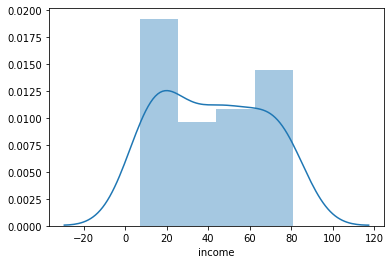

In [8]:
# type, income, education, prestige
sns.distplot(cars.data.income)

In [15]:
Y = cars.data['income']
X = cars.data['education']
X = sm.add_constant(X)

In [16]:
X

,const,education
accountant,1.0,86
pilot,1.0,76
architect,1.0,92
author,1.0,90
chemist,1.0,86
minister,1.0,84
professor,1.0,93
dentist,1.0,100
reporter,1.0,87
engineer,1.0,86


### Model

In [23]:
model = sm.OLS(Y,X)
mod1 = model.fit()

In [53]:
print(mod1.summary())

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     47.51
Date:                Tue, 11 May 2021   Prob (F-statistic):           1.84e-08
Time:                        23:48:23   Log-Likelihood:                -190.42
No. Observations:                  45   AIC:                             384.8
Df Residuals:                      43   BIC:                             388.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.6035      5.198      2.040      0.0

In [27]:
pred1 = mod1.predict(X)

<AxesSubplot:ylabel='income'>

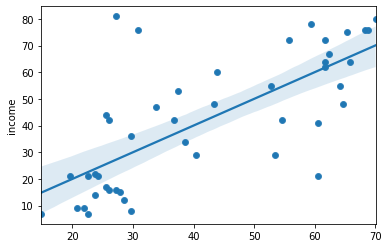

In [33]:
sns.scatterplot(x=pred1,y=Y)
sns.regplot(x=pred1,y=Y)

<AxesSubplot:>

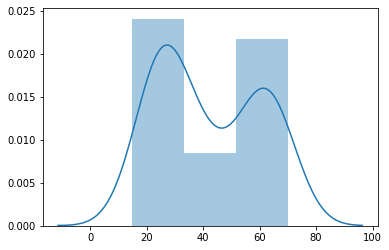

In [34]:
sns.distplot(pred1)

# Logistic Regression

In [77]:
df = sm.datasets.ccard.load(as_pandas=True)
df.data

,AVGEXP,AGE,INCOME,INCOMESQ,OWNRENT
0,124.98,38.0,4.52,20.4304,1.0
1,9.85,33.0,2.42,5.8564,0.0
2,15.00,34.0,4.50,20.2500,1.0
3,137.87,31.0,2.54,6.4516,0.0
4,546.50,32.0,9.79,95.8441,1.0
...,...,...,...,...,...
67,68.38,43.0,2.40,5.7600,0.0
68,474.15,33.0,6.00,36.0000,1.0
69,234.05,25.0,3.60,12.9600,0.0
70,451.20,26.0,5.00,25.0000,1.0


In [75]:
formula = 'OWNRENT ~ AVGEXP+AGE+INCOME+INCOMESQ'

In [78]:
model = smf.glm(formula = formula, data=df.data, family=sm.families.Binomial())
mod2 = model.fit()
print(mod2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                OWNRENT   No. Observations:                   72
Model:                            GLM   Df Residuals:                       68
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -35.427
Date:                Wed, 12 May 2021   Deviance:                       70.854
Time:                        00:13:59   Pearson chi2:                     70.0
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.0833      1.571     -3.872      0.0

In [79]:
pred2 = mod2.predict(df.data)

<AxesSubplot:>

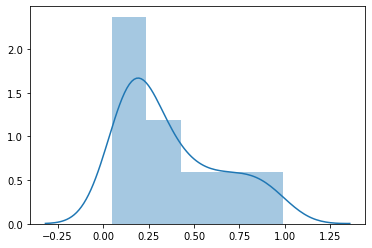

In [80]:
sns.distplot(pred2)

In [87]:
pred2_cat = [1 if x < 0.5 else 0 for x in pred2]

In [90]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(df.data["OWNRENT"], pred2_cat))

[[ 4 41]
 [16 11]]


#  Poisson Regression

In [91]:
df = sm.datasets.grunfeld.load(as_pandas=True)
df.data

,invest,value,capital,firm,year
0,317.600,3078.500,2.800,General Motors,1935.0
1,391.800,4661.700,52.600,General Motors,1936.0
2,410.600,5387.100,156.900,General Motors,1937.0
3,257.700,2792.200,209.200,General Motors,1938.0
4,330.800,4313.200,203.400,General Motors,1939.0
...,...,...,...,...,...
215,4.770,36.494,75.847,American Steel,1950.0
216,6.532,46.082,77.367,American Steel,1951.0
217,7.329,57.616,78.631,American Steel,1952.0
218,9.020,57.441,80.215,American Steel,1953.0


<AxesSubplot:xlabel='invest'>

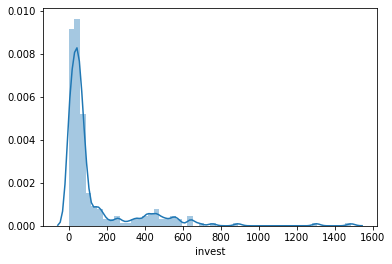

In [93]:
sns.distplot(df.data.invest)

In [94]:
formula = 'invest ~ value+capital'

In [97]:
model = smf.glm(formula = formula, data=df.data, family=sm.families.Poisson())
mod3 = model.fit()
print(mod3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 invest   No. Observations:                  220
Model:                            GLM   Df Residuals:                      217
Model Family:                 Poisson   Df Model:                            2
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -6948.1
Date:                Wed, 12 May 2021   Deviance:                       12629.
Time:                        00:31:59   Pearson chi2:                 1.48e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.9005      0.010    407.427      0.0

In [98]:
pred3 = mod3.predict(df.data)

<AxesSubplot:>

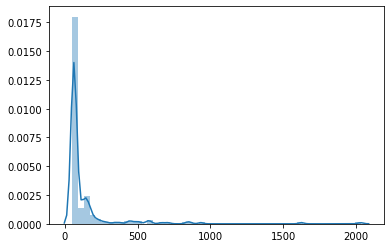

In [99]:
sns.distplot(pred3)

# Explanatory analysis for Linear Regression - Risk Ratio (RR)

In [100]:
print(mod1.summary())

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     47.51
Date:                Wed, 12 May 2021   Prob (F-statistic):           1.84e-08
Time:                        00:35:44   Log-Likelihood:                -190.42
No. Observations:                  45   AIC:                             384.8
Df Residuals:                      43   BIC:                             388.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.6035      5.198      2.040      0.0

In [103]:
RR=np.exp(mod1.params)
RR

const        40275.487725
education        1.812776
dtype: float64

# Explanatory analysis for Logistic Regression - Odds Ratio (OR)

In [104]:
print(mod2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                OWNRENT   No. Observations:                   72
Model:                            GLM   Df Residuals:                       68
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -35.427
Date:                Wed, 12 May 2021   Deviance:                       70.854
Time:                        00:36:43   Pearson chi2:                     70.0
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.0833      1.571     -3.872      0.0

In [105]:
OR=np.exp(mod2.params)
OR

Intercept    0.002281
AVGEXP       1.000121
AGE          1.111471
INCOME       1.870592
dtype: float64

# Explanatory analysis for Poisson Regression - Risk Ratio (RR)

In [106]:
print(mod3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 invest   No. Observations:                  220
Model:                            GLM   Df Residuals:                      217
Model Family:                 Poisson   Df Model:                            2
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -6948.1
Date:                Wed, 12 May 2021   Deviance:                       12629.
Time:                        00:37:50   Pearson chi2:                 1.48e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.9005      0.010    407.427      0.0

In [107]:
RR=np.exp(mod3.params)
RR

Intercept    49.426120
value         1.000523
capital       1.000257
dtype: float64

# Colinearity

In [111]:
df = sm.datasets.ccard.load(as_pandas=True)
df.data

,AVGEXP,AGE,INCOME,INCOMESQ,OWNRENT
0,124.98,38.0,4.52,20.4304,1.0
1,9.85,33.0,2.42,5.8564,0.0
2,15.00,34.0,4.50,20.2500,1.0
3,137.87,31.0,2.54,6.4516,0.0
4,546.50,32.0,9.79,95.8441,1.0
...,...,...,...,...,...
67,68.38,43.0,2.40,5.7600,0.0
68,474.15,33.0,6.00,36.0000,1.0
69,234.05,25.0,3.60,12.9600,0.0
70,451.20,26.0,5.00,25.0000,1.0


In [118]:
X = df.data[['AVGEXP','AGE','INCOME','INCOMESQ']]
X

,AVGEXP,AGE,INCOME,INCOMESQ
0,124.98,38.0,4.52,20.4304
1,9.85,33.0,2.42,5.8564
2,15.00,34.0,4.50,20.2500
3,137.87,31.0,2.54,6.4516
4,546.50,32.0,9.79,95.8441
...,...,...,...,...
67,68.38,43.0,2.40,5.7600
68,474.15,33.0,6.00,36.0000
69,234.05,25.0,3.60,12.9600
70,451.20,26.0,5.00,25.0000


In [121]:
from scipy import stats
print(stats.spearmanr(X['AVGEXP'] , X['AGE']))
print(stats.spearmanr(X['AVGEXP'] , X['INCOME']))
print(stats.spearmanr(X['AVGEXP'] , X['INCOMESQ']))
print(stats.spearmanr(X['AGE'] , X['INCOME']))
print(stats.spearmanr(X['AGE'] , X['INCOMESQ']))
print(stats.spearmanr(X['INCOME'] , X['INCOMESQ']))

SpearmanrResult(correlation=0.18294658998895494, pvalue=0.124000082151991)
SpearmanrResult(correlation=0.5335563653315545, pvalue=1.393396555102211e-06)
SpearmanrResult(correlation=0.5335563653315545, pvalue=1.393396555102211e-06)
SpearmanrResult(correlation=0.44494020833174924, pvalue=9.003662315987262e-05)
SpearmanrResult(correlation=0.44494020833174924, pvalue=9.003662315987262e-05)
SpearmanrResult(correlation=1.0, pvalue=0.0)


<AxesSubplot:xlabel='INCOME', ylabel='INCOMESQ'>

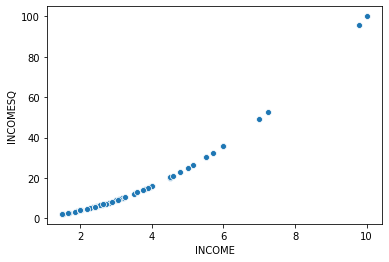

In [124]:
sns.scatterplot(x=X['INCOME'] , y=X['INCOMESQ'])

In [108]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [139]:
def vif(df):
    '''
    VIF = variance inflation function
    '''
    import pandas as pd
    # initialize dictionaries
    vif_dict = {}
    # X must be a dataframe and contain the independent variables only
    for var in df.columns:
        indep = [i for i in df.columns if i != var]
        X, y = df[indep], df[var]

        # extract r-squared from the fit
        #rsqr = LinearRegression().fit(X, y).score(X, y)
        model = sm.OLS(y,X).fit()
        rsqr = model.rsquared
        # calculate VIF
        vif = 1/(1 - rsqr)
        vif_dict[var] = vif

    # return VIF DataFrame
    df_vif = pd.DataFrame({'VIF': vif_dict})

    return df_vif


In [140]:
vif(X)

,VIF
AGE,18.658497
AVGEXP,2.174281
INCOME,58.157815
INCOMESQ,16.776673
